In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('C:/Users/Admin/Downloads/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
correlation = gold_data.corr()

<AxesSubplot:>

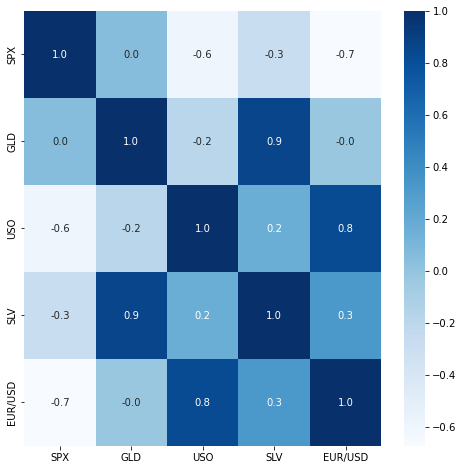

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot= True,cmap = 'Blues',fmt='.1f')

In [9]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

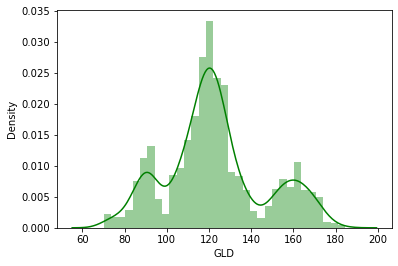

In [10]:
sns.distplot(gold_data['GLD'],color='green')

In [11]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [12]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [13]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [16]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
test_prediction=regressor.predict(X_test)

In [18]:
test_prediction

array([168.43879948,  81.80869991, 116.05460003, 127.54170065,
       120.82510113, 154.85979733, 150.09099833, 126.08640021,
       117.45049892, 125.99470075, 116.62190075, 172.36640058,
       140.84209906, 167.5802986 , 115.32759994, 117.44900039,
       140.30710235, 170.0392004 , 159.59000227, 158.50449989,
       155.07150011, 125.41369985, 176.31510005, 156.94380208,
       125.29460035,  93.82189971,  77.44750003, 120.56780024,
       119.07789931, 167.42579944,  88.35350034, 125.08709992,
        91.04600064, 117.65890033, 121.20859916, 136.42230097,
       115.53620131, 114.92230059, 148.17400044, 107.25050108,
       104.6530024 ,  87.09889758, 126.50620094, 117.98019989,
       153.93609915, 119.55310005, 108.31390011, 107.99469807,
        93.15670074, 127.26129736,  74.93240038, 113.61209917,
       121.26619999, 111.16539871, 118.86769908, 120.73219944,
       159.43979961, 168.15890137, 146.83799651,  85.74889833,
        94.40190035,  86.88499909,  90.45800016, 119.04

In [19]:
error_score = metrics.r2_score(y_test,test_prediction)

In [20]:
error_score

0.9887393967660082

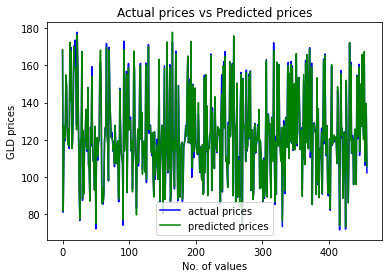

In [22]:
plt.plot(list(y_test),color='blue',label='actual prices')
plt.plot(test_prediction,color='green', label='predicted prices')
plt.xlabel('No. of values')
plt.ylabel('GLD prices')
plt.title('Actual prices vs Predicted prices')
plt.legend()
plt.show()